# 最終課題

独自のデータでデータ分析を行い結果を提出してください。

このNotebookを提出すること。その中に以下を入れてください。

- どのようなデータを使ったかの説明
- 期待する結果や発見したいことは何か？
- コードを示す
- 出来上がったデータ部分析の結果を出力

## データ分析の例

- 独自のデータでWordCloudを作ってみる（以前提出したものとは別の観点が欲しい）
- 独自のデータでトピック分析を行う
- データをたくさん集めて、データの特性を知る
- 既存のデータやサンプルデータで、さまざまな機械学習を実施する

## 評価

以下の観点で評価を行う（それぞれ5点満点）

- データ分析の対象や分野の独自性
- 期待する結果や発見に対する着目点
- コーディング技術
- 分析結果から発見したものの有用性
- さまざまな工夫がされたか、実験コードなどを書き試したか？

## データの説明

ここにデータの概要を記載

## 期待する結果

ここに内容を記載

In [32]:
# コードを記載
# 複数のセルを使って良い

In [33]:
import tweepy
from enum import IntEnum

In [34]:
user_id = 1260187453740081157

In [35]:
# tweepyのclientを作成する
consumer_key = "gzGCxdirTlHcnoqr0VOS7U4ax"
consumer_secret = "ZQQua1F2LR6ypHxJNLWMipFNzkrPvPJApmReF0Svfg0dWGwsuX"
access_token = "868107506362458112-Z0HyDDr25HfqhuueKk2e1lK0trwQ1u6"
access_token_secret = "2RTz8OirWE724DITPxNYyW5RxkdWscz8FdypKOK9qNUkN"
Bearer_Token = "AAAAAAAAAAAAAAAAAAAAAHetewEAAAAAaYTnc5Dpw%2FDmrEkImYuNzMLUIsw%3DLTuiEWjAtzSonVb22IU0qj7JNWvm4FTjKpbLNoZ2g3bFXOiw8N"

client = tweepy.Client(
    Bearer_Token, consumer_key, consumer_secret,
    access_token, access_token_secret,
    # return_type = dict
)


In [36]:
# tweetを取得し、txtファイルに出力
UsersTweets = client.get_users_tweets(user_id, max_results = 100)

outputs = ""
for tweet in UsersTweets.data:
    print("Tweet text:", tweet.text)
    outputs += tweet.text.replace("\n", "<br>") + "\n"

f = open('tweet-texts.txt', 'w', encoding='UTF-8')
f.write(outputs)
f.close()

Tweet text: 欠点と書いて個性と読む
Tweet text: なんかヒューマンドラマみたいになってる気がしてきた
Tweet text: 結局3年になってもいっつも恐れている気がするんだよなぁこのドラフト感本当怖い
Tweet text: @yu01644653 まぁ、必要だったらLINEでもDMでも聞いてくださいな！
Tweet text: @yu01644653 それもわりかしおぼえてるから聞いてくれれば助言するよ
Tweet text: @yu01644653 新歓してたから全員覚えとるので
Tweet text: @yu01644653 聞いてくれれば誰がどのバンドしてた子かとか全然教えるで
Tweet text: 個人的にMuseのベースはマジで天才だと思ってて、単純なくせにユニークなベースライン作るし、ユニークだからといって他の楽器を潰すことは一切なくて、ちょうどいい主張感でむしろ曲を上手に引きたててるのが本当に凄いと思うんだあれ、無駄が無さすぎる
Tweet text: True Love Waits
Tweet text: 何か企画者になって締切設けて募集したりすると教授の気持ちが分かってくるな
Tweet text: @SKR__0627 大丈夫です
Tweet text: 自分の無能さをつくづく実感
Tweet text: @harurunn_PG 飯楽しみにしとくわ
Tweet text: @harurunn_PG 俺見れないし出れないんだ…頑張ってくれ…
Tweet text: 鬼のような日々が終わった…と思ったら次のものがあるのを忘れてた、7月も怖いです
Tweet text: @yu01644653 とんでもなすぎるんだが、、マジでおもろい、俺今度青のスモークサングラスにSlipKnoTのTシャツで出て真面目腐った顔で司会進行しようかな
Tweet text: @harurunn_PG 会計士もそうだね、理系に比べると専門職って少ないなーと思う
そうなんだよなぁ、なんか難しい、それこそ文系で大学入ったけど医学に入学後興味持った時に方向転換するハードルが必要以上に高すぎる気がするんだよね今の教育制度と社会って
Tweet text: SlipKnoTのTシャツでグループディスカッション出ようかと思ったけどさすがに自粛した
Twee

In [37]:
with open("tweet-texts.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [38]:
# 単語化（形態素解析）
from janome.tokenizer import Tokenizer
from janome.tokenfilter import TokenFilter
from janome.tokenfilter import CompoundNounFilter
from janome.tokenfilter import POSKeepFilter
from janome.tokenfilter import LowerCaseFilter
from janome.charfilter import UnicodeNormalizeCharFilter
from janome.analyzer import Analyzer

In [67]:
class StopWordFilter(TokenFilter):
    def __init__(self, words):
        self.stop_words = words
    
    def apply(self, tokens):
        for token in tokens:
            if token.surface not in self.stop_words:
                yield token

In [99]:
stop_words = []
with open("stop-words.txt", "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():
            stop_words.append(line.strip())
stop_words

['<br>',
 '...',
 'ん',
 '@kelmizu',
 '!',
 '??',
 'の',
 '@yu01644653',
 '@harurunn_pg',
 '@minoru9610',
 '@3zcovty7qdxheop',
 '@tanaryuuuuuuuuu',
 '@kaorukecak0816',
 '()',
 'さ',
 '@kyleika065',
 '笑笑',
 'もん',
 '@blue_6sun',
 '......',
 '@raku12203',
 '@k_onnosuke',
 '@sweetcotton117',
 '!!!',
 '@SKR__0627',
 '@manato_unison']

In [100]:
stop_word_filter = StopWordFilter(stop_words)

In [101]:
token_filters = [CompoundNounFilter(),
                POSKeepFilter(["名詞"]),
                LowerCaseFilter(),
                stop_word_filter]

In [102]:
char_filters = [UnicodeNormalizeCharFilter()]

In [103]:
tokenizer = Tokenizer()
words = list(t.tokenize(text, wakati=True))

In [104]:
analyzer = Analyzer(char_filters=char_filters, 
                    tokenizer=tokenizer, 
                    token_filters=token_filters)

In [105]:
noun_words = []
for token in analyzer.analyze(text):
    noun_words.append(token.base_form)

In [106]:
from collections import Counter

In [107]:
c = Counter(noun_words)

In [111]:
top50 = c.most_common(50)

In [112]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [114]:
top50_words = []
for word, num in top50:
    top50_words.append(word)
top50_words[:5]

['気', 'こと', '俺', '今', '好き']

In [115]:
words_text = ""
for word in noun_words:
    if word in top50_words:
        words_text += word
        words_text += " "

In [153]:
fpath = "/Users/kosei/repositories/statistics-work/data-text-work/Noto_Sans_JP/NotoSansJP-Regular.otf"

In [154]:
wordcloud = WordCloud(font_path=fpath,
                      background_color="white", 
                      width=1024, 
                      height=674).generate(words_text)

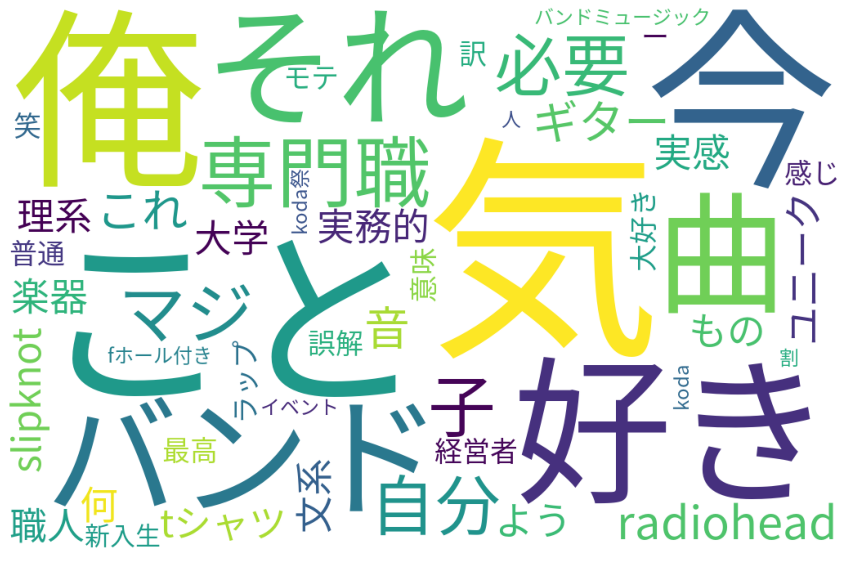

In [156]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig("word_cloud.png")
plt.show()

## 工夫した点

ここに内容を記載
- TwitterのAPIを用いてツイート情報を取得
- ！などの文字は頻出文字としてカウントされないよう、stop wordsに設定。